<a href="https://colab.research.google.com/github/componavt/sns4human/blob/main/src/vk/vk_subscribers_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import ast

In [5]:
orthodox_csv_files = [
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/aleksandronevskiy_sobor_gpetrozavodska_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/monastyr_aleksandra_svirskogo_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/podvore_solovetskogo_monastyrya_v_kemi_prabsk_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/pravoslavie_v_karelii_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/pravoslavnye_karelii_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/prikhod_tserkvi_svvmts_ekateriny_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/prikhozhane_krestovozdvizhenskogo_sobora_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/prikhozhane_sretenskogo_khrama_group_subscribers.csv"
]

lutheran_csv_files = [
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/kemskiy_lyuteranskiy_prikhod_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/kondopozhskiy_evangelicheskolyuteranskiy_prikhod_group_subscribers.csv",
    "https://raw.githubusercontent.com/componavt/sns4human/main/data/vk/lyuterane_rossii__tserkov_ingrii_group_subscribers.csv"
]

In [63]:
orthodox_df = pd.concat([pd.read_csv(url) for url in orthodox_csv_files], ignore_index=True)

In [64]:
lutheran_df = pd.concat([pd.read_csv(url) for url in lutheran_csv_files], ignore_index=True)

In [70]:
# Функция для извлечения названия города
def extract_city_title(city_str):
    if pd.isna(city_str):  # Проверяем на NaN
        return "Не указан"
    try:
        city_dict = ast.literal_eval(city_str)  # Более безопасный способ
        return city_dict.get('title', "Не указан")  # Возвращаем "Не указан", если ключа нет
    except (ValueError, SyntaxError):  # Обрабатываем возможные ошибки
        return "Не указан"

In [71]:
orthodox_df.drop_duplicates(inplace=True)
lutheran_df.drop_duplicates(inplace=True)

orthodox_df['city'] = orthodox_df['city'].apply(extract_city_title)
lutheran_df['city'] = lutheran_df['city'].apply(extract_city_title)

orthodox_df['last_name'] = orthodox_df['last_name'].fillna('unknown')
lutheran_df['last_name'] = lutheran_df['last_name'].fillna('unknown')

orthodox_df['bdate'] = orthodox_df['bdate'].fillna('unknown')
lutheran_df['bdate'] = lutheran_df['bdate'].fillna('unknown')

In [72]:
orthodox_df.head()

,id,city,sex,first_name,last_name,can_access_closed,is_closed,bdate,deactivated
0,17796,Saint Petersburg,2,Alexey,Bondarenko,True,False,unknown,NaN
1,46279,Saint Petersburg,1,Irina,Burova,True,False,2.3,NaN
2,61463,Petrozavodsk,1,Yulya,Novitskaya,True,False,unknown,NaN
3,98184,Petrozavodsk,2,Roman,Gachkin,True,False,unknown,NaN
4,103249,Essoyla (poselok),2,Sergey,Teploukhov,True,False,28.4.1984,NaN


In [73]:
lutheran_df.head()

,id,bdate,city,sex,first_name,last_name,can_access_closed,is_closed,deactivated
0,155820,1.4,Saint Petersburg,1,Masha,Ivanova,True,False,NaN
1,1213205,31.8.1975,Не указан,2,DELETED,unknown,True,False,deleted
2,1224398,20.8.1973,Saint Petersburg,2,Dmitry,Rozet,True,False,NaN
3,1354013,18.11.1990,Saransk,1,Ekaterina,Vilgelm,True,False,NaN
4,1653536,3.10,Vyborg,1,Darya,Shkurlyatyeva,True,False,NaN


In [30]:
orthodox_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5956 entries, 0 to 7120
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5956 non-null   int64 
 1   city               5956 non-null   object
 2   sex                5956 non-null   int64 
 3   first_name         5956 non-null   object
 4   last_name          5956 non-null   object
 5   can_access_closed  5956 non-null   bool  
 6   is_closed          5956 non-null   bool  
 7   bdate              5956 non-null   object
 8   deactivated        255 non-null    object
dtypes: bool(2), int64(2), object(5)
memory usage: 383.9+ KB


In [33]:
lutheran_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1591 entries, 0 to 1694
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1591 non-null   int64 
 1   bdate              1591 non-null   object
 2   city               1591 non-null   object
 3   sex                1591 non-null   int64 
 4   first_name         1591 non-null   object
 5   last_name          1591 non-null   object
 6   can_access_closed  1591 non-null   bool  
 7   is_closed          1591 non-null   bool  
 8   deactivated        138 non-null    object
 9   bdate	             1591 non-null   object
dtypes: bool(2), int64(2), object(6)
memory usage: 115.0+ KB


In [34]:
orthodox_count = orthodox_df.shape[0]
lutheran_count = lutheran_df.shape[0]

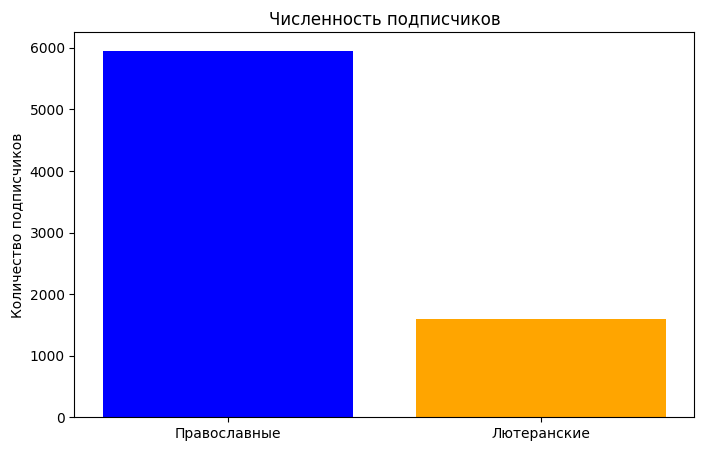

In [38]:
labels = ['Православные', 'Лютеранские']
counts = [orthodox_count, lutheran_count]

plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['blue', 'orange'])
plt.title('Численность подписчиков')
plt.ylabel('Количество подписчиков')
plt.show()

In [40]:
orthodox_gender_distribution = orthodox_df['sex'].value_counts()
lutheran_gender_distribution = lutheran_df['sex'].value_counts()

In [41]:
orthodox_gender_distribution

,count
sex,
1,4842
2,1114


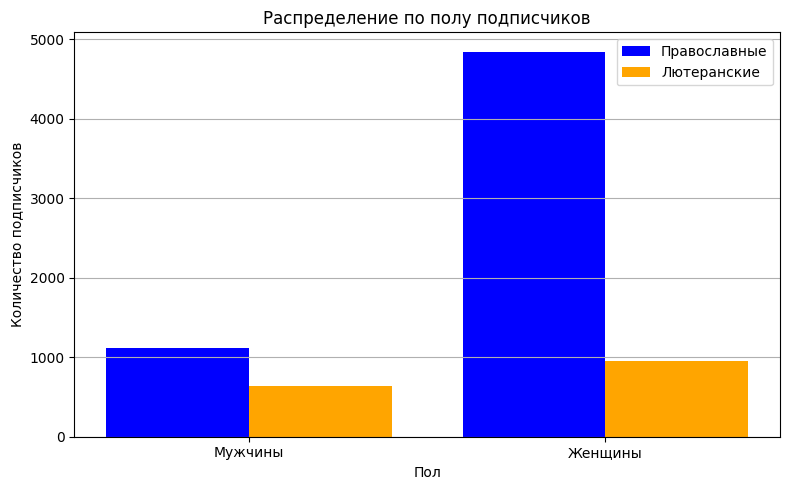

In [45]:
# Подготовка данных для графика
gender_labels = ['Мужчины', 'Женщины']
orthodox_gender_counts = [orthodox_gender_distribution.get(2, 0), orthodox_gender_distribution.get(1, 0)]
lutheran_gender_counts = [lutheran_gender_distribution.get(2, 0), lutheran_gender_distribution.get(1, 0)]

x = range(len(gender_labels))

# Создание графика
plt.figure(figsize=(8, 5))
width = 0.4  # Ширина столбиков

# Столбики для православных
plt.bar(x, orthodox_gender_counts, width=width, label='Православные', color='blue', align='center')

# Столбики для лютеранских, смещенные на ширину столбика
plt.bar([i + width for i in x], lutheran_gender_counts, width=width, label='Лютеранские', color='orange', align='center')

# Настройка графика
plt.title('Распределение по полу подписчиков')
plt.xlabel('Пол')
plt.ylabel('Количество подписчиков')
plt.xticks([i + width / 2 for i in x], gender_labels)  # Центрируем метки по оси X
plt.legend()
plt.grid(axis='y')  # Добавление сетки по оси Y для лучшей читабельности
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

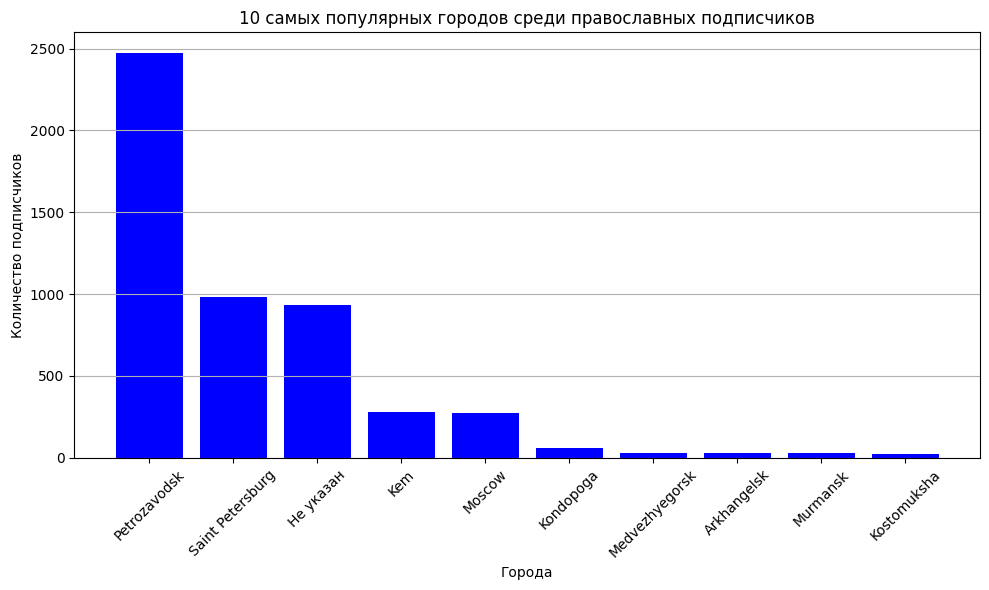

In [74]:
# Группировка по городам и подсчет количества подписчиков
city_counts = orthodox_df.groupby('city').size().reset_index(name='subscribers')

# Сортировка по количеству подписчиков
city_counts = city_counts.sort_values(by='subscribers', ascending=False).head(10)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(city_counts['city'], city_counts['subscribers'], color='blue')
plt.title('10 самых популярных городов среди православных подписчиков')
plt.xlabel('Города')
plt.ylabel('Количество подписчиков')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

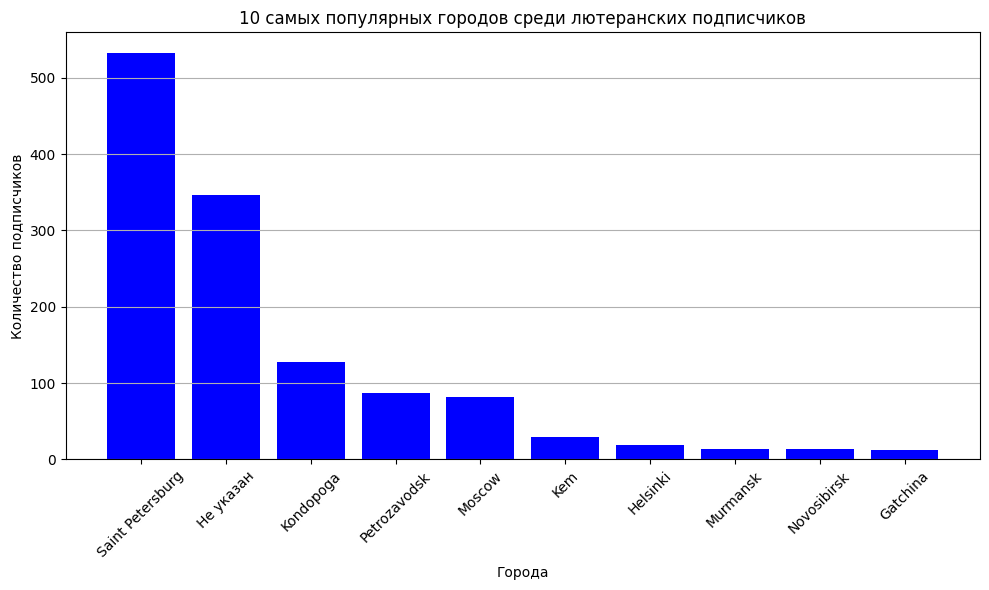

In [75]:
# Группировка по городам и подсчет количества подписчиков
city_counts = lutheran_df.groupby('city').size().reset_index(name='subscribers')

# Сортировка по количеству подписчиков
city_counts = city_counts.sort_values(by='subscribers', ascending=False).head(10)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(city_counts['city'], city_counts['subscribers'], color='blue')
plt.title('10 самых популярных городов среди лютеранских подписчиков')
plt.xlabel('Города')
plt.ylabel('Количество подписчиков')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()